# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction



[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras import layers
from keras.regularizers import l2
from keras import layers
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [ ]:
# Load data into dataframe
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/compresive_strength_concrete.csv')

In [ ]:
# Display shape
display(dataset.shape)

(1030, 9)

In [ ]:
# Display data head
display(dataset.head())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# Check missing values
display(dataset.isnull())
display(dataset.isnull().sum())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
# Checking duplicate rows
dataset[dataset.duplicated()]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [ ]:
# Display Data
display(dataset.describe())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

None

In [ ]:
# Split data into input and outputs
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [ ]:
# Determine size for each training,test and validation set
data_size = len(X)

train_size = int(data_size*0.50)
test_size = int(data_size*0.30)
val_size = int(data_size*0.20)

print("train size:",train_size)
print("validation size:",val_size)
print("test size", test_size)

train size: 515
validation size: 206
test size 309


In [ ]:
# Split data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=val_size,random_state=42)

In [ ]:
# Display training data shape
display(x_train.shape)
display(y_train.shape)

# Display testing data shape
display(x_test.shape)
display(y_test.shape)

# Display validation data shape
display(x_val.shape)
display(y_val.shape)

(515, 8)

(515,)

(309, 8)

(309,)

(206, 8)

(206,)

In [ ]:
# Normalize Data
mean=x_train.mean(axis=0)
x_train-=mean

std=x_train.std(axis=0)
x_train/=std

x_test-=mean
x_test/=std

x_val-=mean
x_val/=std


In [ ]:
# Model to reduce overfitting
from keras.regularizers import l2
import tensorflow as tf
model=Sequential()
model.add(layers.Dense(8, activation='relu',kernel_regularizer=l2(0.01),input_shape=(x_train.shape[1],)))
model.add(layers.Dense(4, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_val,y_val))

Epoch 1/200
515/515 [==============================] - 1s 1ms/step - loss: 1489.1223 - mae: 34.8012 - val_loss: 996.3471 - val_mae: 26.9269
Epoch 2/200
515/515 [==============================] - 1s 1ms/step - loss: 738.2632 - mae: 22.7602 - val_loss: 269.4896 - val_mae: 13.2794
Epoch 3/200
515/515 [==============================] - 1s 1ms/step - loss: 206.7983 - mae: 11.3241 - val_loss: 187.1287 - val_mae: 10.9070
Epoch 4/200
515/515 [==============================] - 1s 1ms/step - loss: 146.2770 - mae: 9.5385 - val_loss: 174.0475 - val_mae: 10.6391
Epoch 5/200
515/515 [==============================] - 1s 1ms/step - loss: 124.6824 - mae: 8.9528 - val_loss: 163.3309 - val_mae: 10.3449
Epoch 6/200
515/515 [==============================] - 1s 1ms/step - loss: 138.7491 - mae: 9.4314 - val_loss: 156.8766 - val_mae: 10.1419
Epoch 7/200
515/515 [==============================] - 1s 1ms/step - loss: 128.5790 - mae: 9.0003 - val_loss: 151.8577 - val_mae: 10.0023
Epoch 8/200
515/515 [=========

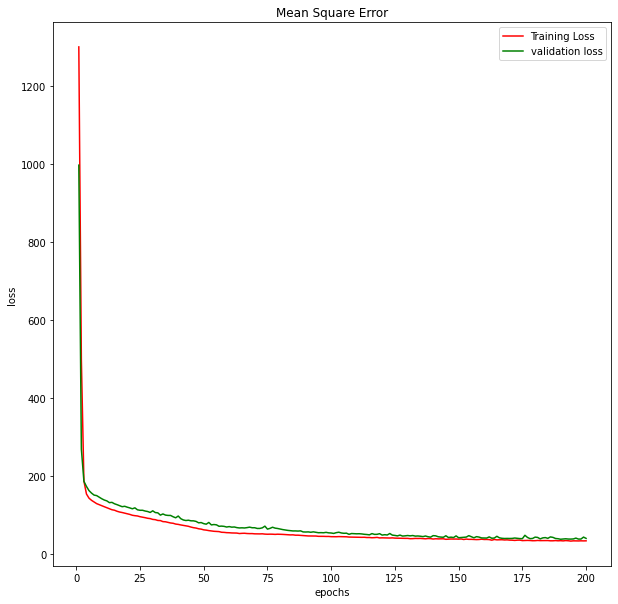

In [ ]:
# Graph between validation and training loss
history_dict=history.history
train_loss=history_dict['loss']
val_loss=history_dict['val_loss']
plt.figure(figsize=(10,10))
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='validation loss')
plt.title('Mean Square Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

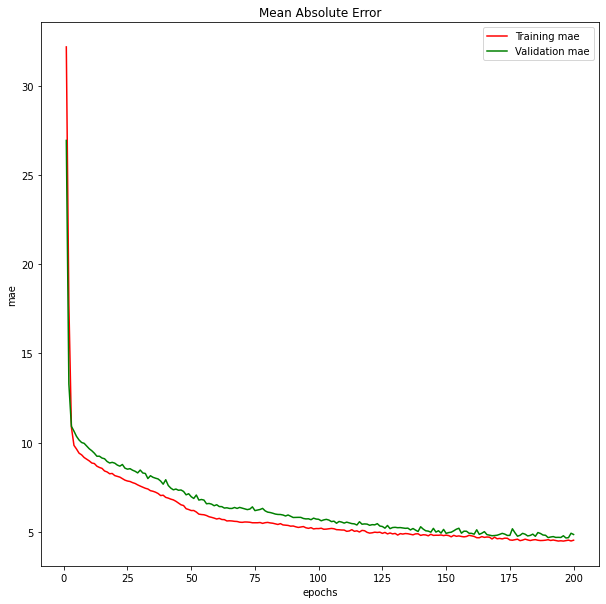

In [ ]:
# Graph between training and validation mae
train_mae=history_dict['mae']
val_mae=history_dict['val_mae']
plt.figure(figsize=(10,10))
plt.plot(epochs,train_mae,'r',label='Training mae')
plt.plot(epochs,val_mae,'g',label='Validation mae')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [ ]:
# Combining Train and Validation Sets to evaluate results
train_data=np.concatenate([x_train,x_val],axis=0)
train_targets=np.concatenate([y_train,y_val],axis=0)

display(train_data.shape)
display(train_targets.shape)

(721, 8)

(721,)

In [ ]:
# Evaluate Model
model=Sequential()
model.add(layers.Dense(8, activation='relu',kernel_regularizer=l2(0.01),input_shape=(x_train.shape[1],)))
model.add(layers.Dense(4, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.Dense(1))
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])
model.fit(train_data,train_targets,epochs=200,batch_size=1,verbose=0)
results=model.evaluate(x_test,y_test)
print(results)

10/10 [==============================] - 0s 2ms/step - loss: 38.7868 - mae: 4.7984
[38.78675842285156, 4.798418998718262]


In [ ]:
# Evaluation mae is 4.79

In [ ]:
# Prdiction
y_Pred=model.predict(x_test)
df=pd.DataFrame(y_test,columns=['Actual'])
df['Prediction']=y_Pred
df['Absolute Error']=np.abs(df['Actual']-df['Prediction'])
display(df)

,Actual,Prediction,Absolute Error
0,52.91,41.672733,11.237267
1,55.90,39.284389,16.615611
2,74.50,63.246078,11.253922
3,35.30,33.092594,2.207406
4,10.54,11.531039,0.991039
...,...,...,...
304,24.92,25.082878,0.162878
305,36.30,34.074917,2.225083
306,32.33,38.293083,5.963083
307,39.29,35.339947,3.950053


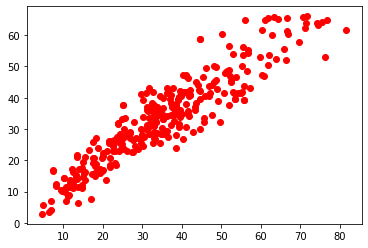

In [ ]:
# Graph between predicted and test values

plt.plot(y_test,y_Pred,'ro')
plt.show()
